In [38]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
from datetime import datetime
%matplotlib inline

### Load Building data per 4 hour bins and split it out...

In [59]:
with open('json/new_buildings.json') as data_file:    
    data = json.load(data_file)
    
'2015-04-25 00:00:00 +0000'
format = '%Y-%m-%d %H:%M:%S +0000'

b_count = [int(x["c"]) for x in data]
u_count = [int(x["u_count"]) for x in data]
times   = [datetime.strptime(x["t"],format) for x in data]
cumulative_buildings = np.cumsum(b_count)

### Now Plot them!

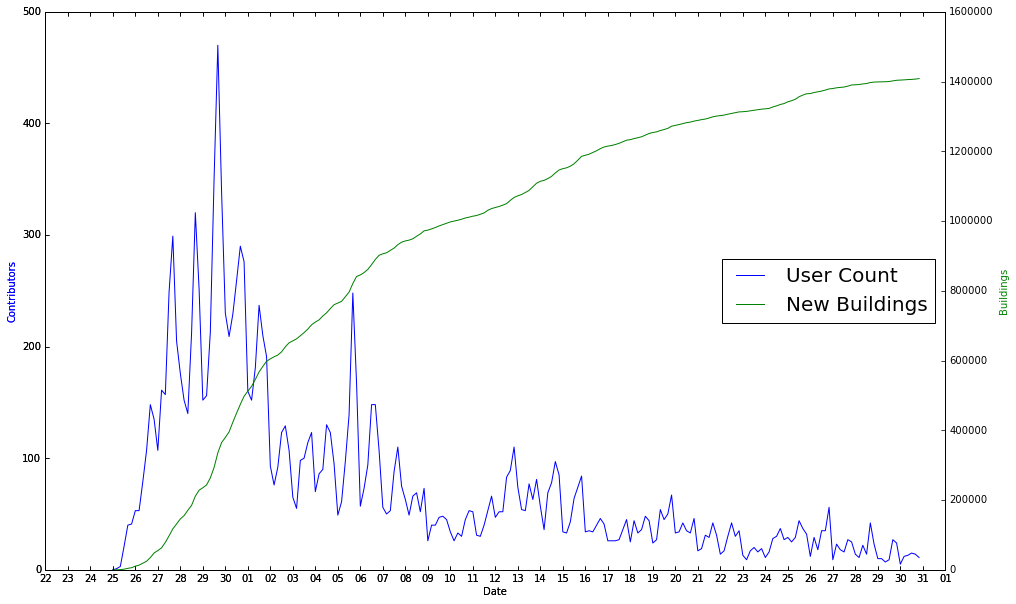

In [65]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

x = dates.date2num(times)

host = host_subplot(111, axes_class=AA.Axes) # This allows 2 plots...

plt.subplots_adjust(right=0.75)

par1 = host.twinx()

p1, = host.plot(x, u_count, label="User Count")
p2, = par1.plot(x, cumulative_buildings, label="New Buildings")

host.legend(fontsize=20, loc="right")
host.figure.set_size_inches(20,10)

host.set_xlabel("Date",)
host.set_ylabel("Contributors")
par1.set_ylabel("Buildings")

host.axes.xaxis.set_major_locator(dates.DayLocator())
host.axes.xaxis.set_major_formatter(dates.DateFormatter('%d'))

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

## Top Users?
Try to calculate users cumulative building count over time for the top contributors?

In [263]:
all_users = {}
for entry in data:
    for these_users in entry["per_user_count"]:
        for user in these_users: 
            if not user in all_users:
                all_users[user] = []
print("All Users: ", len(all_users))

#Iterate through each entry
for entry in data:
    missing_users = list(all_users.keys())
    for user in entry["per_user_count"]:
        (user,buildings) = list(user.items())[0]
        if user in all_users:
            missing_users.remove(user)
            all_users[user].append(buildings)
    for user in missing_users:
        all_users[user].append(0)
        
users_with_10k      = [user for user in all_users if sum(all_users[user])>10000]
users_with_over_1k  = [user for user in all_users if sum(all_users[user])>1000]

users_with_10k.sort(reverse=True, key=(lambda x: sum(all_users[x])))
users_with_over_1k.sort(reverse=True, key=(lambda x: sum(all_users[x])))

All Users:  5494


256


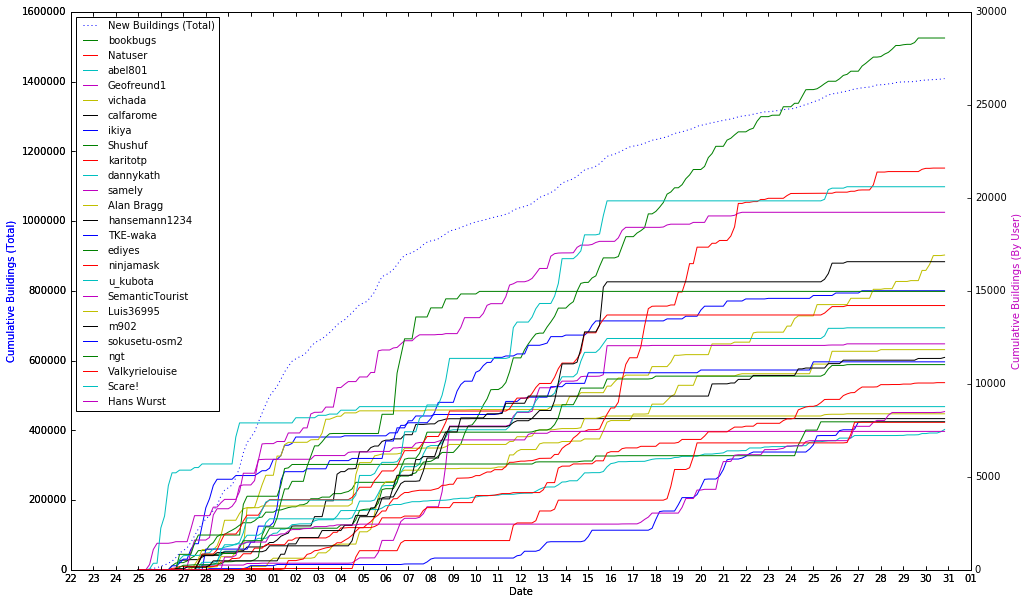

In [269]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

x = dates.date2num(times)

host = host_subplot(111, axes_class=AA.Axes) # This allows 2 plots...

plt.subplots_adjust(right=0.75)

par1 = host.twinx()

h1, = host.plot(x, cumulative_buildings, linestyle=":", label="New Buildings (Total)")

for user in users_with_over_1k[0:25]:
    p2, = par1.plot(x, np.cumsum(all_users[user] ), label=user)

host.legend(fontsize=10, loc="best")
host.figure.set_size_inches(20,10)

host.set_xlabel("Date")
host.set_ylabel("Cumulative Buildings (Total)")
par1.set_ylabel("Cumulative Buildings (By User)")

host.axes.xaxis.set_major_locator(dates.DayLocator())
host.axes.xaxis.set_major_formatter(dates.DateFormatter('%d'))

host.axis["left"].label.set_color(  p1.get_color() )
par1.axis["right"].label.set_color( p2.get_color() )